In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset1 = pd.read_csv(r"C:\Users\DELL\Desktop\weather pro\model_1\model1.csv")
dataset1.head(3)

,Model,Train/Test,R²,MAE,MSE,RMSE,Adj R²,Max Error,Huber Loss,RSE,RAE
0,Linear,Train,76.371212,34.754645,20.211764,4.495750,0.763603,2.576674,9.889268,23.628788,46.256273
1,Linear,Test,76.625021,34.610829,19.972996,4.469116,0.765927,2.462895,9.791672,23.374979,46.077582
2,MLP,Train,89.210473,23.050903,9.229224,3.037964,0.892055,2.083163,4.584546,10.789527,30.679320


In [3]:
# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(dataset1, id_vars=['Model', 'Train/Test'], var_name='Metric', value_name='Value')

In [4]:
# Create separate plots for Training and Testing datasets
train_data = df_melted[df_melted['Train/Test'] == 'Train']
test_data = df_melted[df_melted['Train/Test'] == 'Test']

In [5]:
# Set up custom colors for the bars (change these colors as desired)
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] 

In [6]:
# Separate metrics
metrics = ['R²', 'MAE', 'MSE', 'RMSE', 'Max Error', 'Huber Loss', 'RSE', 'RAE']   # 'Adj R²',
models = ['Linear', 'MLP', 'KNeighbors', 'DecisionTree', 'RandomForest']
train_values = dataset1[dataset1['Train/Test'] == 'Train'][metrics].values
test_values = dataset1[dataset1['Train/Test'] == 'Test'][metrics].values


In [7]:
# Define the colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

In [8]:
# X-axis positions
x = np.arange(len(metrics))  # the label locations
width = 0.10  # width of the bars (reduced to create more space between bars within a group)
bar_gap = 0.03  # additional gap between bars within a group

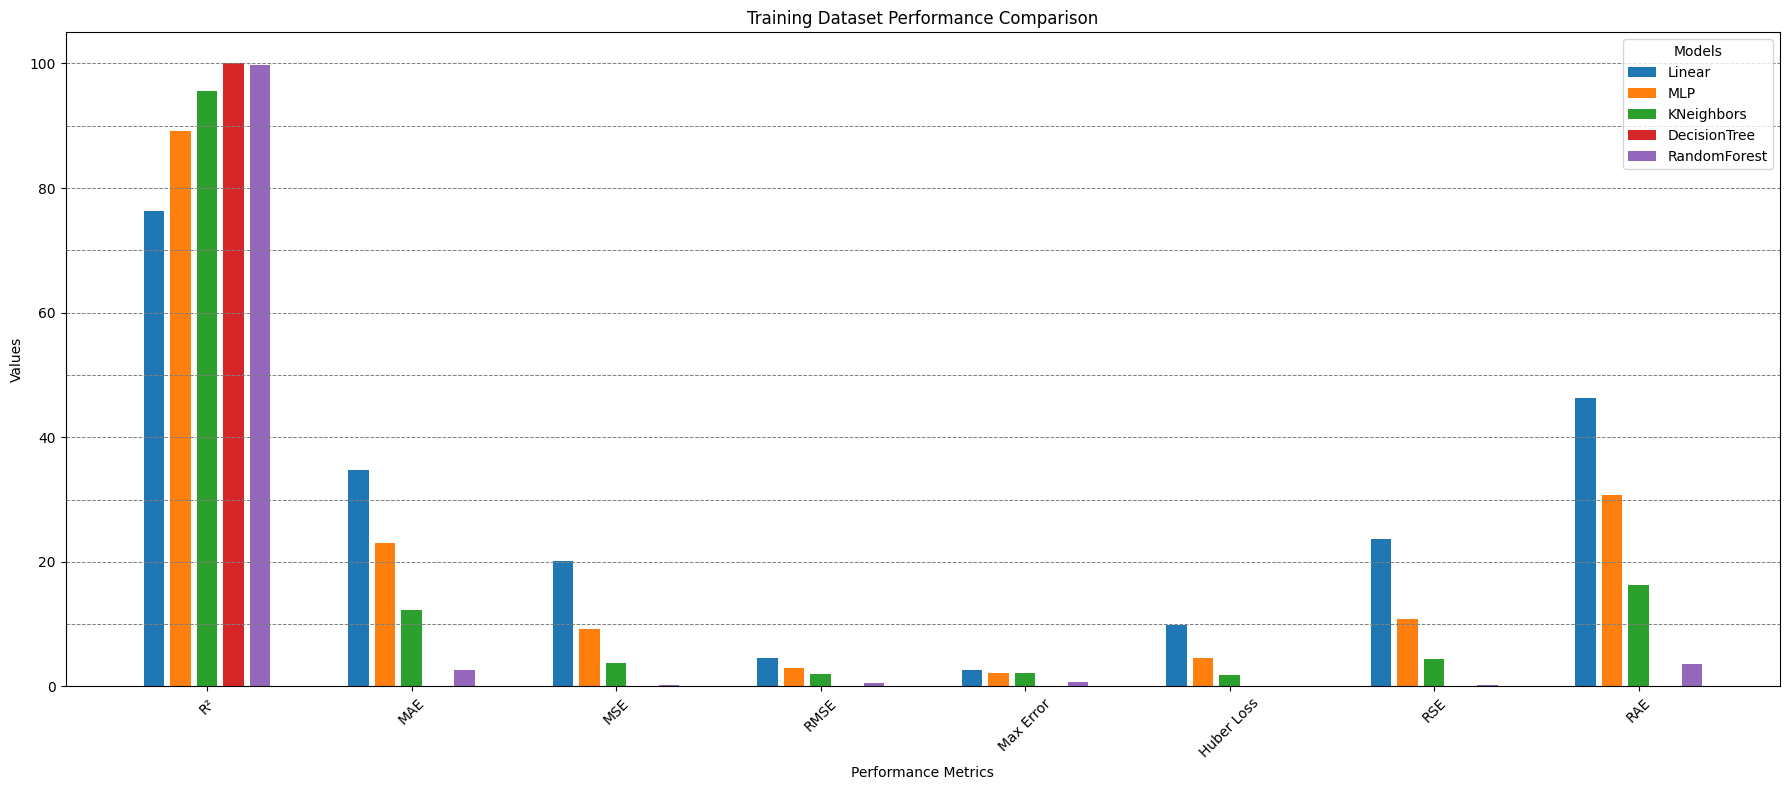

In [9]:
fig, (ax1) = plt.subplots(1, figsize=(18, 8), sharey=True)

# Plotting Training Data
for i, model in enumerate(models):
    ax1.bar(x + i * (width + bar_gap), train_values[i], width, label=model, color=colors[i])

# Adding labels, titles, and ticks
ax1.set_xlabel('Performance Metrics')
ax1.set_ylabel('Values')
ax1.set_title('Training Dataset Performance Comparison')
ax1.set_xticks(x + (width + bar_gap) * (len(models) - 1) / 2)
ax1.set_xticklabels(metrics, rotation=45)

for y in range(0, int(max(train_values.max(), test_values.max())) + 10, 10):
    ax1.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

ax1.legend(title='Models', loc='upper right')

# Adding some padding and layout adjustments
fig.tight_layout()

# Show the plot
plt.show()

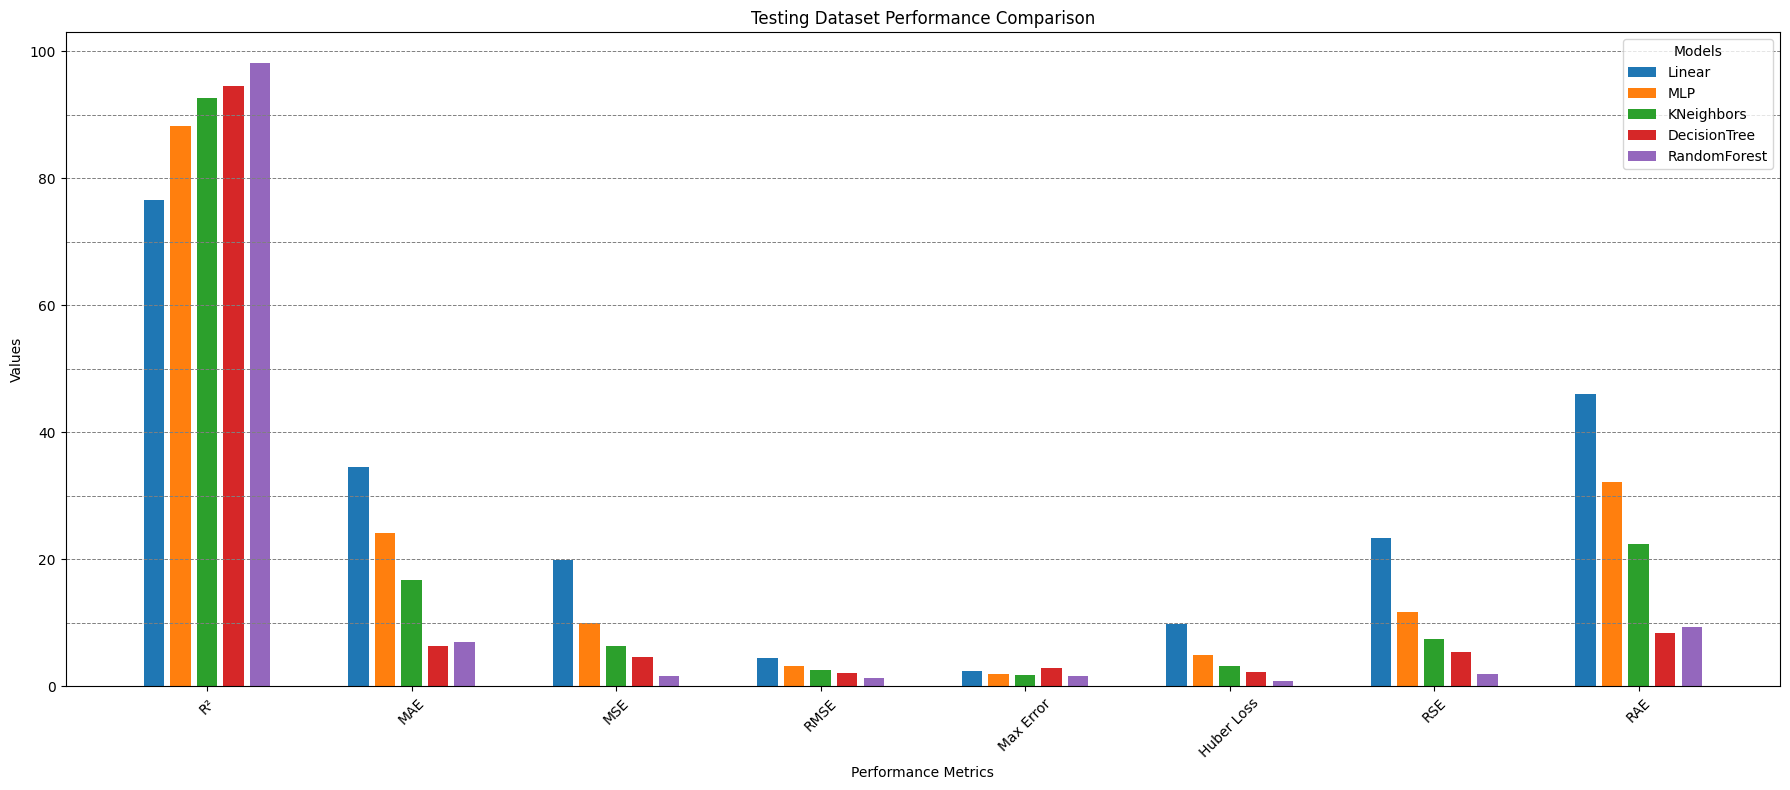

In [12]:
fig, (ax2) = plt.subplots(1, figsize=(18, 8), sharey=True)

# Plotting Testing Data
for i, model in enumerate(models):
    ax2.bar(x + i * (width + bar_gap), test_values[i], width, label=model, color=colors[i])

ax2.set_xlabel('Performance Metrics')
ax2.set_ylabel('Values')
ax2.set_title('Testing Dataset Performance Comparison')
ax2.set_xticks(x + (width + bar_gap) * (len(models) - 1) / 2)
ax2.set_xticklabels(metrics, rotation=45)

# Adding horizontal lines with a gap of 10 on the y-axis
for y in range(0, int(max(train_values.max(), test_values.max())) + 10, 10):
    ax2.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

# Adding the legend to both plots
ax2.legend(title='Models', loc='upper right')

# Adding some padding and layout adjustments
fig.tight_layout()

# Show the plot
plt.show()


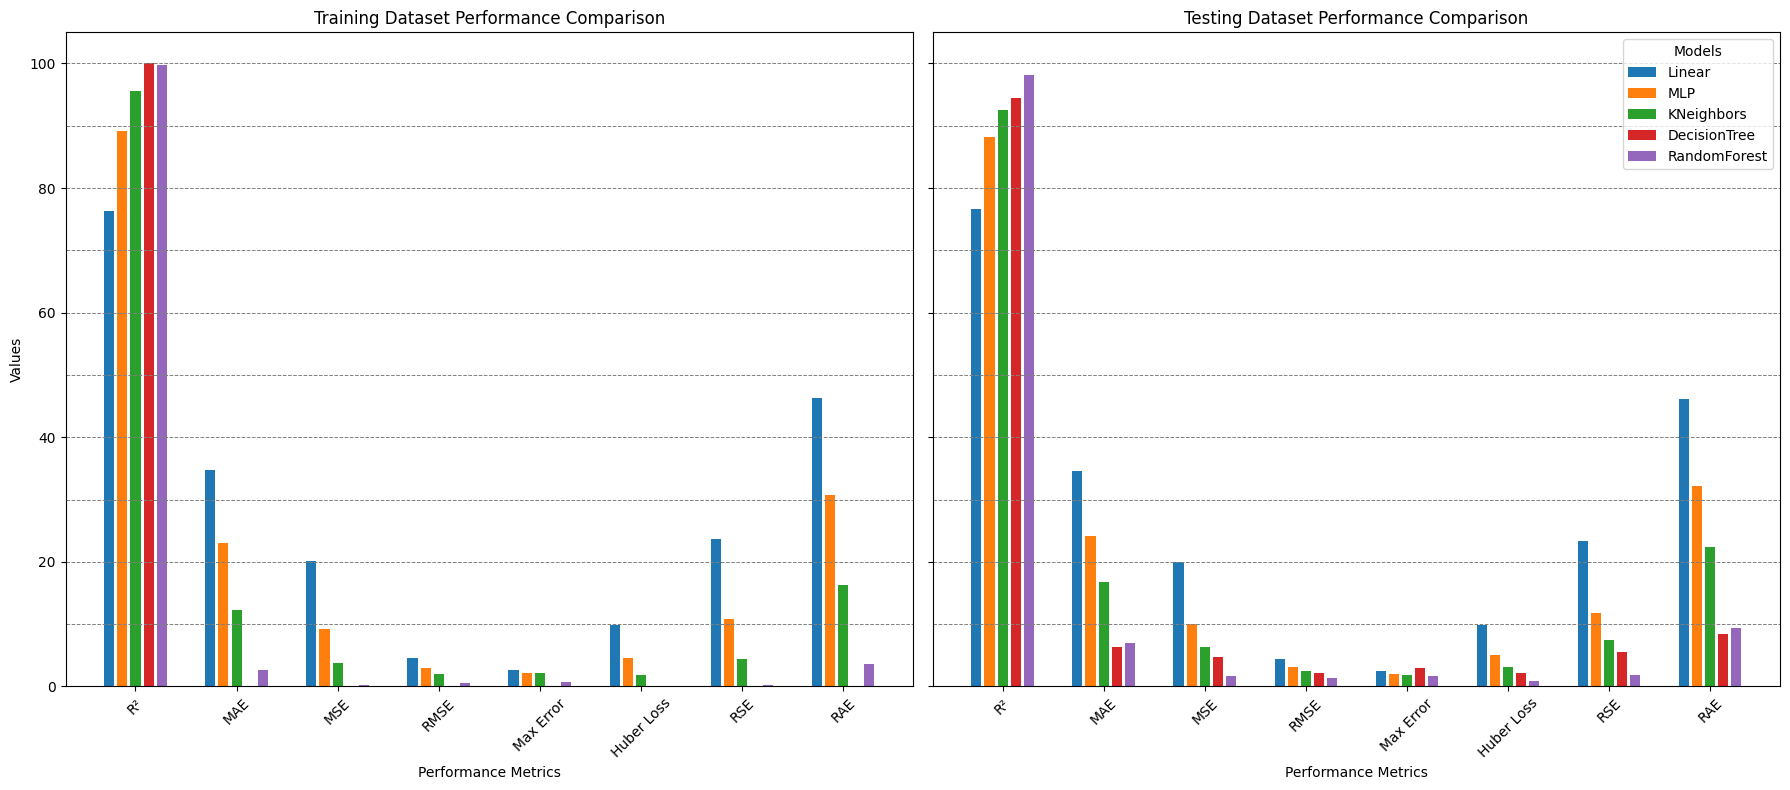

In [11]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plotting Training Data
for i, model in enumerate(models):
    ax1.bar(x + i * (width + bar_gap), train_values[i], width, label=model, color=colors[i])

# Plotting Testing Data
for i, model in enumerate(models):
    ax2.bar(x + i * (width + bar_gap), test_values[i], width, label=model, color=colors[i])

# Adding labels, titles, and ticks
ax1.set_xlabel('Performance Metrics')
ax1.set_ylabel('Values')
ax1.set_title('Training Dataset Performance Comparison')
ax1.set_xticks(x + (width + bar_gap) * (len(models) - 1) / 2)
ax1.set_xticklabels(metrics, rotation=45)

ax2.set_xlabel('Performance Metrics')
ax2.set_title('Testing Dataset Performance Comparison')
ax2.set_xticks(x + (width + bar_gap) * (len(models) - 1) / 2)
ax2.set_xticklabels(metrics, rotation=45)

# Adding horizontal lines with a gap of 10 on the y-axis
for y in range(0, int(max(train_values.max(), test_values.max())) + 10, 10):
    ax1.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)
    ax2.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

# Adding the legend to both plots
# ax1.legend(title='Models', loc='upper left')
ax2.legend(title='Models', loc='upper right')

# Adding some padding and layout adjustments
fig.tight_layout()

# Show the plot
plt.show()
